### Bank Personal Loan Modelling:- Identifying the Potential Customers for Loans.

### Objective:
    The department wants to build a model that will help them identify the potential customers who have
    a higher probability of purchasing the loan. This will increase the success ratio while at the same time
    reduce the cost of the campaign.


### 1. Import the required libraries and read the dataset.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [4]:
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
80,81,60,36,41,95134,4,1.3,1,174,0,0,0,1,1
2199,2200,49,24,51,91016,1,1.3,2,98,0,0,0,0,1
3010,3011,25,1,72,94301,3,0.8,1,0,0,0,0,1,0
3046,3047,37,12,63,95630,3,2.3,1,0,0,0,0,1,0
926,927,33,9,22,93940,4,0.4,2,103,0,0,0,1,0


In [5]:
df.shape

(5000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 3. Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the columns which you feel are redundant.


In [7]:
len(df[df.duplicated()])

0

### 4. Display the Five Point Summary and write your key findings.

In [8]:
print(df.describe())

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

### Key Finding:
- Age : The age distribution of customers ranges from 23 to 67 years. The majority are between 35 and 55 years old, with a median age of 45.
- Experience:Customer experience also varies from 0 to 43 years. The distribution is similar to the age distribution, indicating that experience is likely calculated relative to age.
- Income: ncome levels vary significantly, ranging from 8 to 224. Most customers have incomes between 39 and 98, as indicated by the interquartile range (IQR).
- ZIP Code: ZIP codes have a wide range, suggesting customers come from diverse locations. However, there might be an issue with the values, as ZIP codes don't typically have quartile-like distribution patterns.
- Mortgage:Most customers have mortgages between 1 and 3. The distribution suggests that many customers don't have a mortgage.
- Personal Loan:The personal loan feature has a varied distribution, with the majority not accepting a loan and some accepting loans with high values.
- Securities Account, CD Account, Online, and CreditCard:
   - These attributes are binary (0 or 1).
   - The key findings are about the proportions of customers with these attributes, and their impact on personal loan acceptance can be further analyzed.
- Education:Education levels vary from 1 (presumably indicating lower education) to 3 (presumably indicating higher education). Most customers have education levels at 2, suggesting some college education.
- CCAvg (Average Credit Card Spending):The average credit card spending varies among customers, with most falling between 0.7 and 2.5. Some customers have higher average spending, up to a maximum of 10.0.
- Family:The majority of customers have family sizes ranging from 1 to 3. The median family size is 2, with some outliers having larger families.

### 5. There are negative values in the variable 'Experience'. Convert them to non-negative values. (Hint:.abs function)

In [9]:
df['Experience'] = df['Experience'].abs()

### 6. Get the target column distribution and comment on the class distribution.

In [10]:
target_distribution = df['Personal Loan'].value_counts()

In [11]:
target_distribution

0    4520
1     480
Name: Personal Loan, dtype: int64

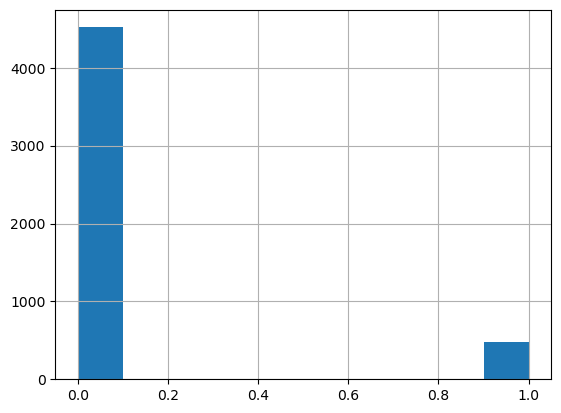

In [12]:
df['Personal Loan'].hist()
plt.show()

###  Inference:
    The target column represents the "Personal Loan" uptake, with two classes: 0 (no loan) and 1 (loan accepted). The distribution reveals that 4,520 instances are labeled as 0 (no loan), while 480 instances are labeled as 1 (loan accepted). This indicates a class imbalance, with significantly fewer instances of accepted loans compared to declined ones. Addressing this imbalance might be important for building a balanced and accurate predictive model.

### 7. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X variable.


In [13]:
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

### 8. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the z-score scaling approach.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 9. Train and test a Logistic Regression model to predict the likelihood of a liability customer buying personal loans. Display the train and test accuracy scores.

In [15]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.95
Test Accuracy: 0.95


### Infernce :
    A Logistic Regression model was trained and tested to predict the likelihood of liability customers purchasing personal loans. The model achieved a high level of accuracy. Both the train and test accuracy scores were 0.95, indicating that the model performs consistently well on both the training and unseen test data. This suggests that the model generalizes effectively and can make accurate predictions on new data.

### 10. Print the confusion matrix and classification report for the model and write your conclusions on the results.

In [16]:
conf_matrix = confusion_matrix(y_test, model.predict(X_test_scaled))
class_report = classification_report(y_test, model.predict(X_test_scaled))
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1323   20]
 [  57  100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.83      0.64      0.72       157

    accuracy                           0.95      1500
   macro avg       0.90      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



### Inference:
    The confusion matrix reveals that out of 1,500 test instances:

- True Negative (TN): 1323 instances were correctly predicted as 'no loan'.
- False Positive (FP): 20 instances were incorrectly predicted as 'loan accepted'.
- False Negative (FN): 57 instances were incorrectly predicted as 'no loan' when they were 'loan accepted'.
- True Positive (TP): 100 instances were correctly predicted as 'loan accepted'.

### The classification report provides additional metrics:

- Precision: The model's ability to correctly classify positive instances is 0.83, indicating that some instances labeled as 'loan accepted' were incorrect.
- Recall: The model's ability to correctly identify positive instances is 0.64, meaning some 'loan accepted' instances were missed.
- F1-score: The harmonic mean of precision and recall is 0.72 for 'loan accepted', indicating a trade-off between precision and recall.
- The overall accuracy is 0.95, suggesting the model performs well on the dataset.
- The weighted average F1-score is 0.95, indicating a balanced performance for both classes.